# This notebook is for vector arithmetic implementation on the trained CGAN Latent Space

Import all the required libraries for vector arithmetic

In [0]:
#loading the generator model and generating images
import numpy
from numpy import asarray
from tensorflow.keras.models import load_model
from matplotlib import pyplot
from numpy import load
from numpy import mean
from numpy import vstack
from numpy import expand_dims
from numpy import savez_compressed
from numpy import array
import os
import matplotlib.pyplot as plt

Mount your google drive on the colab 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/deeplearning/")
!ls

The generator model in the GAN architecture takes a point from the latent space as input and generates a new image. The latent space itself has no meaning. Typically it is a 100-dimensional hypersphere with each variable drawn from a Gaussian distribution with a mean of zero and a standard deviation of one. Through training, the generator learns to map points onto the
latent space with specific output images and this mapping will be different each time the model is trained. The latent space has structure when interpreted by the generator model, and this structure can be queried and navigated for a given model.

Typically, new images are generated using random points in the latent space. Taken a step further, points in the latent space can be constructed (e.g. all 0s, all 0.5s, or all 1s) and used as input or a query to generate a specific image. A series of points can be created on a linear path between two points in the latent space, such as two generated images. These points can be used to generate a series of images that show a transition between the two generated images. Finally, the points in the latent space can be kept and used in simple vector arithmetic to create new points in the latent space that, in turn, can be used to generate images. This is an interesting idea, as it allows for the intuitive and targeted generation of images.

The important 2015 paper by Alec Radford, et al. titled Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks introduced a stable model configuration for training deep convolutional neural network models as part of the GAN architecture. In the paper, the authors explored the latent space for GANs fit on a number of different training datasets, most notably a dataset of celebrity faces. They demonstrated two interesting aspects. The first was the vector arithmetic with faces. For example, a face of a smiling woman minus the face of a neutral woman plus the face of a neutral man resulted in the face of a smiling man.

smiling woman − neutral woman + neutral man = smiling man 

Specifically, the arithmetic was performed on the points in the latent space for the resulting faces. Actually on the average of multiple faces with a given characteristic, to provide a more robust result.

Running the image generator loads the model, generates faces, and saves the latent vectors and generated faces. The latent vectors are saved to a compressed NumPy array with the filename latent points.npz. The 100 generated faces are plotted in a 10 × 10 grid and saved in a file named generated_faces.png. In this case, we have a good collection of faces to work with. Each face has an index that we can use to retrieve the latent vector. For example, the first face is 1, which corresponds to the first vector in the saved array (index 0). We will perform the operation:

smiling woman − neutral woman + neutral man = smiling man

Therefore, we need four faces for each of smiling woman, neutral woman, and neutral man.
In this case, we will use the following indexes in the image:
Smiling Woman: 32,46,92,100
Neutral Woman: 3,49, 74,98
Neutral Man: 2,4,24,94

Now that we have latent vectors to work with and a target arithmetic, we can get started. First, we can specify our preferred images and load the saved NumPy array of latent points.

In [0]:
dirImage = "results/test_images/generated_plot_dataset1_001.png"
dirModel = "results/models/generator_model_200.h5"
dirLatentPoints = "results/latent_points/latent_points_100.npz"
toothysmile_woman_ix = [32,46,92,100]
toothysmile_man_ix = [3,49, 74,98]
neutral_man_ix = [2,4,24,94]

We can explore the latent space by performing vector arithmetic with the generated faces. First, we must generate a large number of faces and save both the faces and their corresponding latent vectors. We can then review the plot of generated faces and select faces with features we’re interested in, note their index (number), and retrieve their latent space vectors for manipulation.

Next, we can retrieve each vector and calculate the average for each vector type (e.g. smiling woman). We could perform vector arithmetic with single images directly, but we will get a more robust result if we work with an average of a few faces with the desired property. The average points() function below takes the loaded array of latent space points, retrieves each, calculates the average, and returns all of the vectors.

In [0]:
# average list of latent space vectors
def average_points(points, ix):
    # convert to zero offset points
    zero_ix = [i-1 for i in ix]
    # retrieve required points
    vectors = points[zero_ix]
    # average the vectors
    avg_vector = mean(vectors, axis=0)
    # combine original and avg vectors
    all_vectors = vstack((vectors, avg_vector))
    return all_vectors

In [0]:
# create a plot of generated images
def plot_generated(examples, rows, cols):
    # plot images
    for i in range(rows * cols):
        # define subplot
        pyplot.subplot(rows, cols, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(examples[i, :, :])
    pyplot.savefig("results/vector_arithmetic_results/generated_input_vector_arithmetic_dataset1.png")
    pyplot.show()

We can now use this function to retrieve all of the required points in latent space and generate images.

Finally, we can use the average vectors to perform vector arithmetic in latent space and plot
the result.

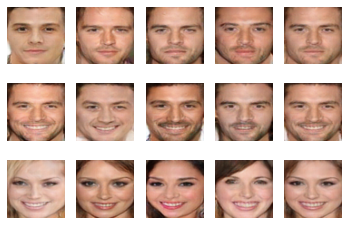

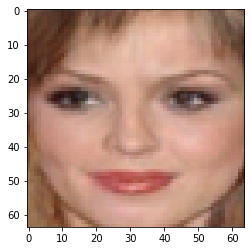

In [0]:
# load model
model = load_model(dirModel)
# load the saved latent points
data = load(dirLatentPoints)
points = data['arr_0']
# average vectors
toothysmile_woman = average_points(points, toothysmile_woman_ix)
toothysmile_man = average_points(points, toothysmile_man_ix)
neutral_man = average_points(points, neutral_man_ix)
# combine all vectors
all_vectors = vstack((neutral_man, toothysmile_man, toothysmile_woman))
#create labels for embedding
all_labels = array((1,1,1,1,1,  1,1,1,1,1, 2,2,2,2,2))
# generate images
images = model.predict([all_vectors, all_labels])
# scale pixel values
images = (images + 1) / 2.0
plot_generated(images,3,5)

# neutral man - toothysmile man + toothysmile woman = neutral woman
result_vector = neutral_man[-1] - toothysmile_man[-1] + toothysmile_woman[-1]
# generate image
result_vector = expand_dims(result_vector, 0)
labels = array([2])
result_image = model.predict([result_vector, labels])
# scale pixel values
result_image = (result_image + 1) / 2.0
pyplot.imshow(result_image[0])
pyplot.savefig("results/vector_arithmetic_results/generated_resultant_vector_arithmetic_dataset1.png")
pyplot.show()
